In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [1]:
# see how MNIST data look like
print("num examples")
print("train, valid, test")
print(mnist.train.num_examples, mnist.validation.num_examples, mnist.test.num_examples)

# scikit-image: python imaging library
import skimage.io as io
%matplotlib inline  
# how next_batch work?
# you don't need to know at this time...
im = mnist.train.next_batch(1)[0].reshape(28, 28)
io.imshow(im)

num examples
train, valid, test


NameError: name 'mnist' is not defined

## Note
MNIST image is (784,) shape, so if you want plot this you must reshape into (28, 28)

In [3]:
# set parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf placeholder
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# initializing the variables
init = tf.global_variables_initializer()

In [4]:
sess = tf.Session()

sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                      y: batch_ys})
        # compute average loss
        avg_cost += c / total_batch
    # display logs per epoch step
    if (epoch+1) % display_step == 0:
        print("Epoch: {0:04d} cost={1:.9f}" .format(epoch+1, avg_cost))

print("Optimization Finished!")

# test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# calculate accuracy for 3000 examples
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: {0}"
      .format(sess.run(accuracy, feed_dict={x: mnist.test.images[:3000], y: mnist.test.labels[:3000]})))

Epoch: 0001 cost=1.181937457
Epoch: 0002 cost=0.664753782
Epoch: 0003 cost=0.552757355
Epoch: 0004 cost=0.498688611
Epoch: 0005 cost=0.465160990
Epoch: 0006 cost=0.442533503
Epoch: 0007 cost=0.425339254
Epoch: 0008 cost=0.412169698
Epoch: 0009 cost=0.401537917
Epoch: 0010 cost=0.392290021
Epoch: 0011 cost=0.384671018
Epoch: 0012 cost=0.378475145
Epoch: 0013 cost=0.372222680
Epoch: 0014 cost=0.367216929
Epoch: 0015 cost=0.362592109
Epoch: 0016 cost=0.358764361
Epoch: 0017 cost=0.354753922
Epoch: 0018 cost=0.351453854
Epoch: 0019 cost=0.347995837
Epoch: 0020 cost=0.345692891
Epoch: 0021 cost=0.342687203
Epoch: 0022 cost=0.339984622
Epoch: 0023 cost=0.338239727
Epoch: 0024 cost=0.335848841
Epoch: 0025 cost=0.333558215
Optimization Finished!
Accuracy: 0.8889999985694885


[9]


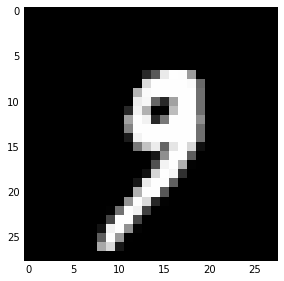

In [5]:
inference = tf.argmax(pred, 1)

# plot one example
ex_im = mnist.test.images[1000].reshape(1, -1)
io.imshow(ex_im.reshape(28, 28))
ex_pred = sess.run(inference, feed_dict={x:ex_im})
print(ex_pred)

In [6]:
sess.close()